# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score as cvs
import matplotlib.pyplot as plt
import seaborn as sns

# Get The Data

In [2]:
df = pd.read_csv('../playground-series-s4e2/train.csv')

# View The Data

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# Preprocess the Data

In [4]:
#check for null values
print(df.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
df.drop('id', axis=1, inplace = True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# 1. Encode categorical features
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'NObeyesdad'

# Encode categorical features using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Encode the target variable
df[target] = encoder.fit_transform(df[target])

# 2. Split the data into features (X) and target (y)
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

In [7]:
# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

# Train Model

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train)

LinearRegression()

In [10]:
# Retrieve and display the coefficients alongside feature names
coefficients = pd.Series(linear_model.coef_, index=X_train.columns)
print("Feature Coefficients:\n", coefficients)

# Identify the most and least important features
most_important = coefficients.idxmax()
least_important = coefficients.idxmin()

print(f"Most important feature: {most_important} (Coefficient: {coefficients[most_important]})")
print(f"Least important feature: {least_important} (Coefficient: {coefficients[least_important]})")

Feature Coefficients:
 Gender                            0.127606
Age                               0.292131
Height                           -0.308606
Weight                            0.661170
family_history_with_overweight    0.241000
FAVC                             -0.199670
FCVC                             -0.097186
NCP                              -0.184234
CAEC                              0.253240
SMOKE                            -0.042491
CH2O                              0.120368
SCC                               0.046219
FAF                               0.033635
TUE                               0.036941
CALC                             -0.201767
MTRANS                            0.058869
dtype: float64
Most important feature: Weight (Coefficient: 0.6611702125799697)
Least important feature: Height (Coefficient: -0.30860591242037294)


# Evaluate The Model

In [11]:
# 6. Evaluate the Model
# Predictions
y_pred = linear_model.predict(X_test_normalized)

In [12]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2.5335956095011563
Root Mean Squared Error: 1.591727240924511


# Evaluating Linear Regression Performance Using 10-Fold Cross-Validation with Normalization

In [13]:
# Create a pipeline with standard scaling and linear regression
clf = make_pipeline(StandardScaler(), linear_model)

# Perform cross-validation
mse_list = cvs(clf, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive and calculate RMSE
rmse_list = np.sqrt(-mse_list)

# Print RMSE for each fold and mean RMSE
print("RMSE for each fold:", rmse_list)
print("Mean RMSE:", np.mean(rmse_list))

RMSE for each fold: [1.58104439 1.62314336 1.58436053 1.55740782 1.59356765 1.59786575
 1.59827869 1.59040804 1.61389017 1.55856389]
Mean RMSE: 1.5898530292051152


                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.07      0.13       513
      Normal_Weight       0.31      0.22      0.26       608
     Obesity_Type_I       0.03      0.04      0.04       589
    Obesity_Type_II       0.06      0.10      0.07       681
   Obesity_Type_III       0.41      0.92      0.57       777
 Overweight_Level_I       0.09      0.01      0.01       489
Overweight_Level_II       1.00      0.00      0.00       495

           accuracy                           0.24      4152
          macro avg       0.37      0.20      0.16      4152
       weighted avg       0.35      0.24      0.18      4152



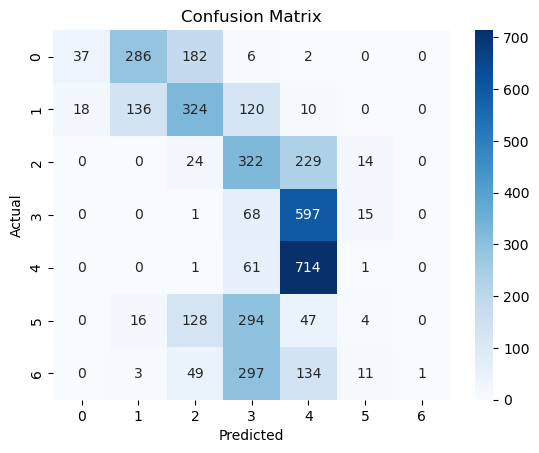

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Map continuous predictions to nearest class
y_pred_class = np.round(y_pred).astype(int)

# Clip values to valid class range (0 to 5)
y_pred_class = np.clip(y_pred_class, 0, 6)


# Convert the numeric predictions and true labels back to the original class names
y_pred_classes = encoder.inverse_transform(y_pred_class)  # Convert predicted values back
y_test_classes = encoder.inverse_transform(y_test)  # Convert true values back

# Classification report
print(classification_report(y_test_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Get the coefficients of the model
feature_coefficients = linear_model.coef_

# Pair the feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': feature_coefficients
})

# Sort the features
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Show the top and worst features
top_features = feature_importance.head(3)  # Top 3 features
worst_features = feature_importance.tail(3)  # Bottom 3 features

print("Top Features:")
print(top_features)

print("\nWorst Features:")
print(worst_features)

Top Features:
  Feature  Coefficient  Importance
3  Weight     0.661170    0.661170
2  Height    -0.308606    0.308606
1     Age     0.292131    0.292131

Worst Features:
   Feature  Coefficient  Importance
9    SMOKE    -0.042491    0.042491
13     TUE     0.036941    0.036941
12     FAF     0.033635    0.033635
